In [1]:
from fenics import *

In [2]:
# Read mesh from file
mesh = UnitSquareMesh(400, 400)

In [3]:
# Define function space for system of concentrations
P1 = FiniteElement("P", triangle, 1)
element = MixedElement([P1, P1])
V = FunctionSpace(mesh, element)

In [4]:
# Define test functions
v_1, v_2 = TestFunctions(V)

In [5]:
# Define functions for f amd g
u = Function(V)

# Split system functions to access components
f, g = split(u)

In [12]:
# Define boundaries
top     = 'near(x[1], 1.0)'
right   = 'near(x[0], 1.0)'
bottom  = 'near(x[1], 0.0)'
left    = 'near(x[0], 0.0)'

# Define boundary conditions
bc_f_top    = DirichletBC(V.sub(0), Expression("pow(x[0], 2)", degree=2), top)
bc_f_right  = DirichletBC(V.sub(0), Expression("x[1]", degree=1), right)
bc_f_bottom = DirichletBC(V.sub(0), Constant(0.0), bottom)
bc_f_left   = DirichletBC(V.sub(0), Constant(0.0), left)

bc_g_top    = DirichletBC(V.sub(1), Expression("pow(x[0], 2)+1", degree=2), top)
bc_g_right  = DirichletBC(V.sub(1), Expression("pow(x[1], 2)+1", degree=2), right)
bc_g_bottom = DirichletBC(V.sub(1), Expression("pow(x[0], 2)", degree=2), bottom)
bc_g_left   = DirichletBC(V.sub(1), Expression("pow(x[1], 2)", degree=2), left)

# bc_f = [bc_f_top, bc_f_bottom, bc_f_right, bc_f_left]
# bc_g = [bc_g_top, bc_g_bottom, bc_g_right, bc_g_left]
bc_array = [bc_f_top, bc_f_bottom, bc_f_right, bc_f_left, bc_g_top, bc_g_bottom, bc_g_right, bc_g_left]


In [13]:
# Define source terms
s_1 = Expression("2*x[1] + pow(x[0], 2) + pow(x[1], 2)", degree=2)
s_2 = Expression("4 - pow(x[0], 2) * x[1]", degree=3)

In [14]:
# Define variational problem
F = dot(grad(v_1), grad(f)) * dx + dot(grad(v_2), grad(g)) * dx - v_1 * (g - s_1) * dx - v_2 * (-f - s_2) *dx

In [15]:
solve(F==0, u, bc_array)

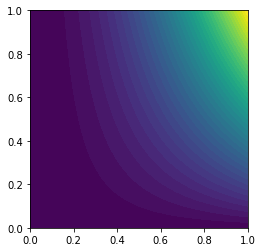

In [16]:
plot(f)

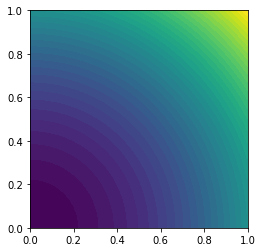

In [17]:
plot(g)

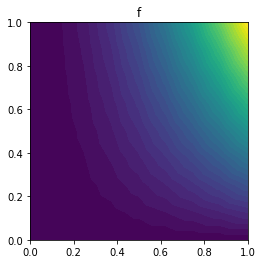

In [12]:
plot(Expression("pow(x[0], 2) * x[1]", degree=3), mesh=mesh, title="f")

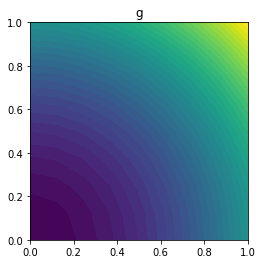

In [11]:
plot(Expression("pow(x[0], 2) + pow(x[1], 2)", degree=2), mesh=mesh, title="g")

In [18]:
f_exact = Expression("pow(x[0], 2) * x[1]", degree=3)
g_exact = Expression("pow(x[0], 2) + pow(x[1], 2)", degree=2)

In [19]:
vertex_values_f_exact = f_exact.compute_vertex_values(mesh)
vertex_values_g_exact = g_exact.compute_vertex_values(mesh)
vertex_values_f = f.compute_vertex_values(mesh)
vertex_values_g = g.compute_vertex_values(mesh)

error_max_f = np.max(np.abs(vertex_values_f_exact - vertex_values_f))
print("error_max =", error_max_f)
error_max_g = np.max(np.abs(vertex_values_g_exact - vertex_values_g))
print("error_max =", error_max_g)

AttributeError: 'Indexed' object has no attribute 'compute_vertex_values'

In [25]:
f.vector()

AttributeError: 'Indexed' object has no attribute 'vector'